**Modules pour charger les données dans Spark:**

In [1]:
#import obligatoires
import findspark
from pyspark.sql import SparkSession
import pyspark


#Initialisation de findspark:

findspark.init()
#%matplotlib notebook

#Récupération de SparkContext
sc = pyspark.SparkContext(appName="Pi")
spark = SparkSession.builder.appName("SimpleApp").getOrCreate()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import re

class Figures :
    
    @staticmethod
    def showPieChart(x,y, title = "PieChart"):
        """Cette fonction affiche le widget PieChart en fonction de pourcentages"""
        y2 = [float(i) for i in y]
        labels = Figures.funCalcLabel(y,y2)
        #colors = ['#86bcb6','#b6992d','#59a14f','#ffbe7d','#f28e2b','#8cd17d','#a0cbe8','#f1ce63','#e15759','#499894']
        fig, ax = plt.subplots(figsize=(15, 12), subplot_kw=dict(aspect="equal"))

        wedges, texts= ax.pie(y2,startangle=90, labels=labels)

        ax.legend(wedges, x,
                  title="légende",
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1))

        ax.set_title(title)
        return plt.show()

    @staticmethod
    def funCalcPercent(pct, allvals):
        """Cette fonction calcule le pourcentage du nombre de chaque type de test """
        absolute = pct/np.sum(allvals)*100.
        return str(round(absolute,2))+"%"
    
    @staticmethod
    def funCalcLabel(y,y2):
        """ Cette fonction utilise funCalcPercent pour calculer l'ensemble des poucentages."""
        L = []
        for i in range(0,len(y)):
            L .append(Figures.funCalcPercent(y[i],y2))
        return L
    
    @staticmethod
    def funShowHisto(axisYValues, axisXLabels, setAxisXLabels = False, yAxisName = "axe Y", xAxisName = "axe X"):
        """Cette fonction affiche l'histogramme"""
        # Basic plot
        height = axisYValues
        bars = [i for i in range(0,len(axisXLabels))]
        x_pos = np.arange(len(bars))
        plt.subplots(figsize=(29,5))
        plt.title(xAxisName)
        plt.ylabel(yAxisName)
        #On met des noms sur l'axe des abcisses si vrai
        if (setAxisXLabels):
            plt.xticks(bars,axisXLabels)
        plt.bar(x_pos, height)
        
    
    

**Chargement des données:**

In [3]:
#Lecture du dataframe
data = spark.read.csv("data.csv", header=True, sep=",")

**Affichage des différents colonnes:**

In [4]:
data

DataFrame[ID: string, URL: string, CRAWL_SOURCE: string, PROPERTY_TYPE: string, NEW_BUILD: string, DESCRIPTION: string, IMAGES: string, SURFACE: string, LAND_SURFACE: string, BALCONY_SURFACE: string, TERRACE_SURFACE: string, ROOM_COUNT: string, BEDROOM_COUNT: string, BATHROOM_COUNT: string, LUNCHROOM_COUNT: string, TOILET_COUNT: string, FURNISHED: string, FIREPLACE: string, AIR_CONDITIONING: string, GARDEN: string, SWIMMING_POOL: string, BALCONY: string, TERRACE: string, CELLAR: string, PARKING: string, PARKING_COUNT: string, HEATING_TYPES: string, HEATING_MODE: string, FLOOR: string, FLOOR_COUNT: string, CONSTRUCTION_YEAR: string, ELEVATOR: string, CARETAKER: string, ENERGY_CONSUMPTION: string, GREENHOUSE_GAS_CONSUMPTION: string, MARKETING_TYPE: string, PRICE: string, PRICE_M2: string, PRICE_EVENTS: string, RENTAL_EXPENSES: string, RENTAL_EXPENSES_INCLUDED: string, DEPOSIT: string, FEES: string, FEES_INCLUDED: string, EXCLUSIVE_MANDATE: string, AGENCIES_UNWANTED: string, OCCUPIED: str

# Partie Datacleansing:

In [5]:
data.filter("PROPERTY_TYPE == 'PROGRAM'").show(2)

+---+---+------------+-------------+---------+-----------+------+-------+------------+---------------+---------------+----------+-------------+--------------+---------------+------------+---------+---------+----------------+------+-------------+-------+-------+------+-------+-------------+-------------+------------+-----+-----------+-----------------+--------+---------+------------------+--------------------------+--------------+-----+--------+------------+---------------+------------------------+-------+----+-------------+-----------------+-----------------+--------+-----------+-----------+-------+----+--------+---------+----------------------+--------------------+---------------+------------------------+
| ID|URL|CRAWL_SOURCE|PROPERTY_TYPE|NEW_BUILD|DESCRIPTION|IMAGES|SURFACE|LAND_SURFACE|BALCONY_SURFACE|TERRACE_SURFACE|ROOM_COUNT|BEDROOM_COUNT|BATHROOM_COUNT|LUNCHROOM_COUNT|TOILET_COUNT|FURNISHED|FIREPLACE|AIR_CONDITIONING|GARDEN|SWIMMING_POOL|BALCONY|TERRACE|CELLAR|PARKING|PARKING_

**ID Processing:**

In [6]:
data.select(data.ID).show(2)

+--------------------+
|                  ID|
+--------------------+
|22c05930-0eb5-11e...|
|8d092fa0-bb99-11e...|
+--------------------+
only showing top 2 rows



In [7]:
#regroupement par ID
dataGroupByID = data.groupBy('ID').count()
dataGroupByID.show(2)

+--------------------+-----+
|                  ID|count|
+--------------------+-----+
|91df4150-9f6d-11e...|    1|
|   Commerces à 100 m|    1|
+--------------------+-----+
only showing top 2 rows



**ID Reporting:**

In [8]:
idGroupByID = dataGroupByID.toPandas()["ID"].values.tolist()
Count = dataGroupByID.toPandas()["count"].values.tolist()

cpt = 0
listIndexes = list()
for i in range(len(idGroupByID)):
    if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", idGroupByID[i])):
        cpt +=1
        listIndexes.append(i)
        

sortedListIndexes = sorted(listIndexes, reverse=True)
        
for i in sortedListIndexes:
    del idGroupByID[i]
    del Count[i]
    
Count.append(cpt)
idGroupByID.append("UUID")

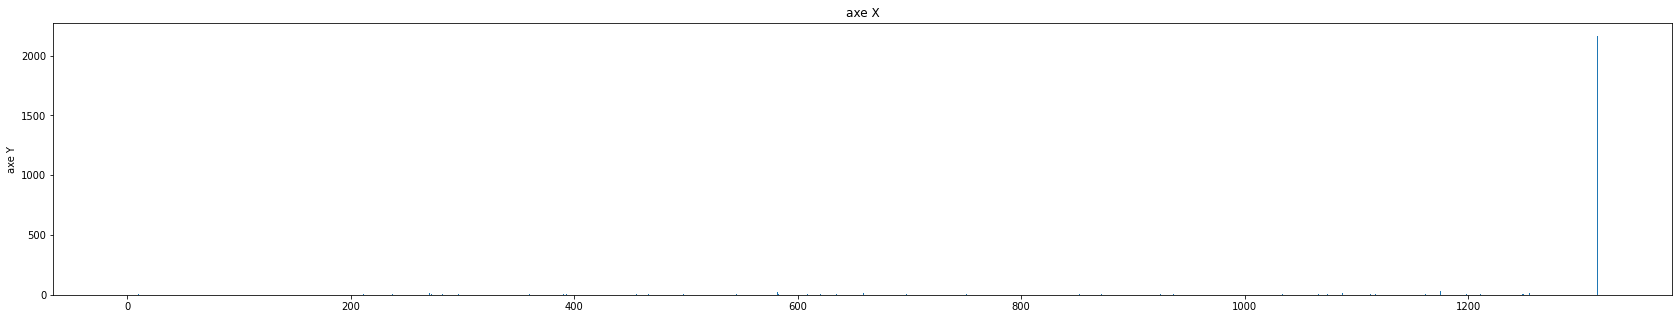

In [9]:
Figures.funShowHisto(Count, idGroupByID)

In [10]:
idGroupByID = dataGroupByID.toPandas()["ID"].values.tolist()
Count = dataGroupByID.toPandas()["count"].values.tolist()

cpt = 0
cpt2 = 0
for i in range(len(idGroupByID)):
    if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", idGroupByID[i])):
        cpt +=1
        
    else:
        cpt2 +=1

labels = ["UUID","nonUUID"]
values = [cpt,cpt2]
#print (values)

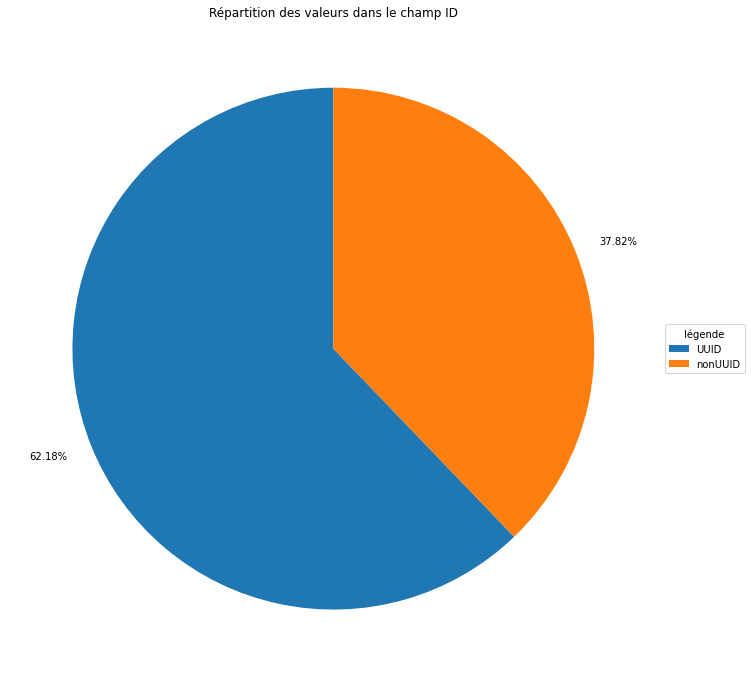

In [11]:
Figures.showPieChart(labels,values,"Répartition des valeurs dans le champ ID")

*L'analyse montre que la colonne ID est constitué d'autres types de valeurs différents d'un UUID. Donc pour corriger ces données il y a deux possibités:*
- Soit **générer des UUID** pour les valeurs incorrectes
- Soit **supprimmer toutes les lignes avec des valeurs d'ID incorrectes**


**1. Générer des UUID pour les valeurs incorrectes:**

In [12]:
import uuid

#Colonne initial ID non traité
IDColumnNotCleanned = data.toPandas()["ID"].values.tolist()

def checkIfUUIDExist(lists, value):
    """Cette fonction permet de vérifier si l'UUID généré existe dans la liste"""
    if value in lists:
        return True
    return False

def generateUUID():
    """Cette fonction permet de générer un UUID en cherchant déjà si elle existe ou pas"""
    val = str(uuid.uuid4())   
    if checkIfUUIDExist(IDColumnNotCleanned, val):
        generateUUID()
    return (val,)

# Pour convertir un RDD en tuple, il ne faut pas oublier de renvoyer dans la fonction lambda des tuple. Exemple: (x[0], )
IDCleanned = data.select("ID").rdd.map(lambda x: (x[0], ) if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", x[0])) else generateUUID() )

#test3 = test2.flatMap(lambda x: x if bool(re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", x)) else str(uuid.uuid1()))

In [13]:
IDCleanned = IDCleanned.toDF()

IDCleanned = IDCleanned.withColumnRenamed("_1", "ID")

IDCleanned.show(10)

+--------------------+
|                  ID|
+--------------------+
|22c05930-0eb5-11e...|
|8d092fa0-bb99-11e...|
|44b6a5c0-3466-11e...|
|e9e07ed0-812f-11e...|
|872302b0-5a21-11e...|
|de04afa0-2e5f-11e...|
|530c7ac0-36a5-11e...|
|5135e0a0-62dd-11e...|
|bc076370-45ec-11e...|
|4ac7f40b-e485-400...|
+--------------------+
only showing top 10 rows



**2. Supprimmer toutes les lignes avec des valeurs d'ID incorrectes:**

In [14]:
#Experssion régulière qui reconnait un UUID
expression = r'\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b'

#Requête qui récupère toutes les lignes avec un ID qui a la forme d'un UUID:
dataIDOnlyUUID = data.filter(data['ID'].rlike(expression))

In [15]:
dataIDOnlyUUID.show(2)

+--------------------+--------------------+----------------+-------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+--------------+---------------+------------+---------+---------+----------------+------+-------------+-------+-------+------+-------+-------------+-------------+------------+-----+-----------+-----------------+----------+----------+------------------+--------------------------+--------------+-----+--------+------------+---------------+------------------------+---------+-----------------+--------------------+--------------------+-------------------+--------------------+-----------+-----------+-------+----+--------+--------------------+----------------------+--------------------+------------------+------------------------+
|                  ID|                 URL|    CRAWL_SOURCE|PROPERTY_TYPE|NEW_BUILD|         DESCRIPTION|              IMAGES|

**Bonus ID Precessing:**

In [16]:
#Bonus: Essayer de remplacer l'ancienne colonne ID par la nouvelle colonne ID traité:

from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType

listIDCleanned = IDCleanned.toPandas()["ID"].values.tolist()

name = 'ID'
udf = UserDefinedFunction(lambda x: 'UUID', StringType())

new_data = data.withColumn('ID', udf(data.ID))

In [17]:
new_data.select(new_data.ID).show(2)

+----+
|  ID|
+----+
|UUID|
|UUID|
+----+
only showing top 2 rows



In [18]:
#data = data.withColumn('ID', IDCleanned.ID)

**Fin ID Processing**

**AD.CRAWL_SOURCE Processing:**

In [19]:
data.select(data.CRAWL_SOURCE).show(2)

+----------------+
|    CRAWL_SOURCE|
+----------------+
|A_VENDRE_A_LOUER|
|        BIEN_ICI|
+----------------+
only showing top 2 rows



In [20]:
#regroupement par CRAWL_SOURCE
dataGroupByCrawl_source = data.groupBy('CRAWL_SOURCE').count()
dataGroupByCrawl_source.show()

+--------------------+-----+
|        CRAWL_SOURCE|count|
+--------------------+-----+
|""https://img0.le...|    1|
|""https://img6.le...|    1|
|""https://img5.le...|    1|
|""https://img6.le...|    1|
|PROPRIETES_DE_FRANCE|   21|
|          une entrée|    2|
|""https://img1.le...|    1|
| cuisine américai...|    1|
|""https://img2.le...|    1|
| 2 fenêtres sur r...|    1|
|""https://img1.le...|    1|
|""https://img6.le...|    1|
| nous vous invito...|    1|
| une cuisine indé...|    1|
|""https://img4.le...|    1|
| de la gare de CL...|    1|
|""https://img3.le...|    1|
| au sixième étage...|    1|
|""https://img6.le...|    1|
| le lycée et les ...|    4|
+--------------------+-----+
only showing top 20 rows



In [21]:
#Liste officiel des sites sources:
listOfOfficialCrawlSources = ["EXPLORIMMO", "EXPLORIMMO_NEUF", "LE_BON_COIN", "LE_BON_COIN_NEUF", "LOGIC_IMMO", "LOGIC_IMMO_NEUF", "OUEST_FRANCE_IMMO", "PARU_VENDU", "SE_LOGER", "SE_LOGER_NEUF", "PAP", "IMMONOT", "BELLES_DEMEURES", "PROPRIETES_DE_FRANCE", "LUX_RESIDENCE", "BIEN_ICI", "A_VENDRE_A_LOUER", "MEILLEURS_AGENTS", "SURFACE_PRIVEE", "IMMONEUF"]

**Reporting:**

In [22]:
#Dans cette section nous allons utiliser un instrument de visualisation pour voir comment les données sont réparties.
#Le code ci-dessous va permettre de regrouper les valeurs de la colonne n'appartenant pas la liste des sources officielles

#Récupération des deux colonnes du groupBy sous forme de liste.
Crawl_sources = dataGroupByCrawl_source.toPandas()["CRAWL_SOURCE"].values.tolist()
Count = dataGroupByCrawl_source.toPandas()["count"].values.tolist()

cpt = 0
listIndexes = list()

#On compte le nombre de valeurs aberrantes dans la colonne en enregistrant leur position pour les enlever après.
for i in range(len(Crawl_sources)):
    if Crawl_sources[i] not in listOfOfficialCrawlSources:
        cpt +=1
        listIndexes.append(i)

#trie dans l'ordre décroissant pour éviter que l'index sorte de la liste.
sortedListIndexes = sorted(listIndexes, reverse=True)

#Suppressions des valeurs incorrectes issues du groupBy.
for i in sortedListIndexes:
    del Crawl_sources[i]
    del Count[i]
        
Crawl_sources.append("Outliers")
Count.append(cpt)

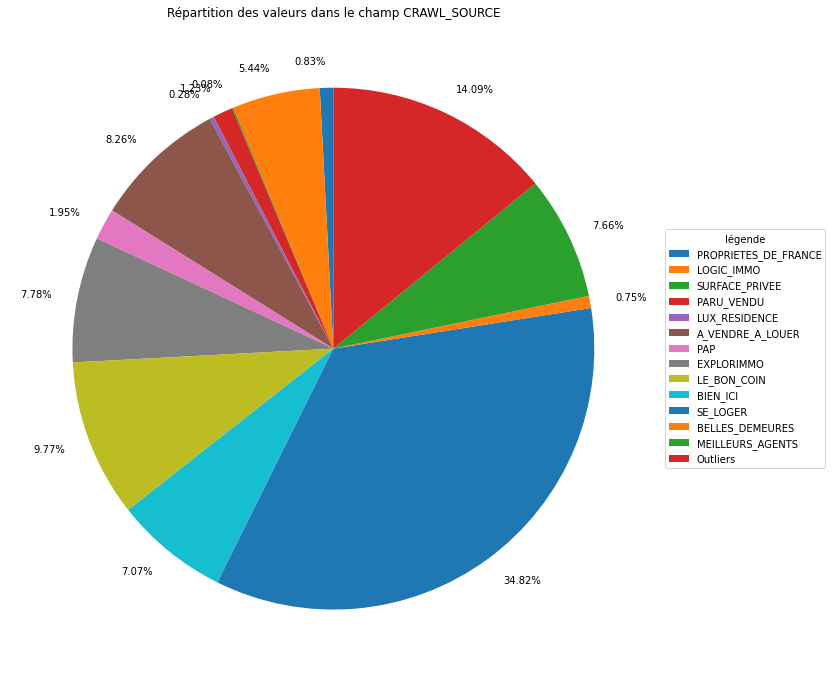

In [23]:
Figures.showPieChart(Crawl_sources,Count,"Répartition des valeurs dans le champ CRAWL_SOURCE")

**AD.CRAWL_SOURCE Processing:**

*L'analyse montre que la colonne CRAWL_SOURCE est constitué de 14,09% de valeurs abberrantes (Outliers). Donc pour corriger ces données il n'y a qu'une seule possibilité:*
- **Supprimmer toutes les lignes avec des valeurs de CRAWL_SOURCE incorrectes**


**Suppression de toutes les lignes avec des valeurs incorrectes:**

In [24]:
#Requête qui récupère toutes les lignes avec un CRAWL_SOURCE correct (qui fait partie de la liste officiel) 
dataWithCrawl_sourceCorrect = data.filter(data['CRAWL_SOURCE'].isin(listOfOfficialCrawlSources))

In [25]:
dataWithCrawl_sourceCorrect.select(dataWithCrawl_sourceCorrect.CRAWL_SOURCE).show()

+----------------+
|    CRAWL_SOURCE|
+----------------+
|A_VENDRE_A_LOUER|
|        BIEN_ICI|
| BELLES_DEMEURES|
|        SE_LOGER|
| BELLES_DEMEURES|
|      EXPLORIMMO|
|        SE_LOGER|
|      EXPLORIMMO|
|     LE_BON_COIN|
|     LE_BON_COIN|
|        BIEN_ICI|
|     LE_BON_COIN|
|     LE_BON_COIN|
|      EXPLORIMMO|
|     LE_BON_COIN|
|        SE_LOGER|
|        SE_LOGER|
|  SURFACE_PRIVEE|
|      EXPLORIMMO|
|     LE_BON_COIN|
+----------------+
only showing top 20 rows



**Fin AD.CRAWL_SOURCE Processing:**

**AD.PROPERTY_TYPE Processing:**

In [26]:
data.select(data.PROPERTY_TYPE).show(2)

+-------------+
|PROPERTY_TYPE|
+-------------+
|    APARTMENT|
|    APARTMENT|
+-------------+
only showing top 2 rows



In [27]:
#regroupement par PROPERTY_TYPE
dataGroupByProperty_type = data.groupBy('PROPERTY_TYPE').count()
dataGroupByProperty_type.show()

+--------------------+-----+
|       PROPERTY_TYPE|count|
+--------------------+-----+
|""https://img6.le...|    1|
|""https://img2.le...|    1|
|""https://img3.le...|    1|
| situé rue Jean J...|    1|
| metro anatole fr...|    1|
| une salle de bai...|    1|
|""https://img7.le...|    1|
|""https://img0.le...|    1|
| (possibilité sui...|    1|
|""https://img2.le...|    1|
| 2/3 pièces meubl...|    1|
|""https://img3.le...|    1|
|""https://img1.le...|    1|
| d'une grande sal...|    1|
| salle d'eau avec...|    1|
|""https://img7.le...|    1|
|""https://img1.le...|    1|
|""https://img4.le...|    1|
|""https://img6.le...|    1|
|                5m2)|    1|
+--------------------+-----+
only showing top 20 rows



In [28]:
#Liste officiel des types de bien:
listOfOfficialProperty_type = ["HOUSE", "APARTMENT", "PREMISES", "LAND", "BUILDING", "PARKING"]

**Reporting:**

In [29]:
#Dans cette section nous allons utiliser un instrument de visualisation pour voir comment les données sont réparties.
#Le code ci-dessous va permettre de regrouper les valeurs de la colonne n'appartenant pas la liste des types de bien

#Récupération des deux colonnes du groupBy sous forme de liste.
Property_types = dataGroupByProperty_type.toPandas()["PROPERTY_TYPE"].values.tolist()
Count = dataGroupByProperty_type.toPandas()["count"].values.tolist()

cpt = 0
listIndexes = list()

#On compte le nombre de valeurs aberrantes dans la colonne en enregistrant leur position pour les enlever après.
for i in range(len(Property_types)):
    if Property_types[i] not in listOfOfficialProperty_type:
        cpt +=1
        listIndexes.append(i)

#trie dans l'ordre décroissant pour éviter que l'index sorte de la liste.
sortedListIndexes = sorted(listIndexes, reverse=True)

#Suppressions des valeurs incorrectes issues du groupBy.
for i in sortedListIndexes:
    del Property_types[i]
    del Count[i]
        
Property_types.append("Outliers")
Count.append(cpt)

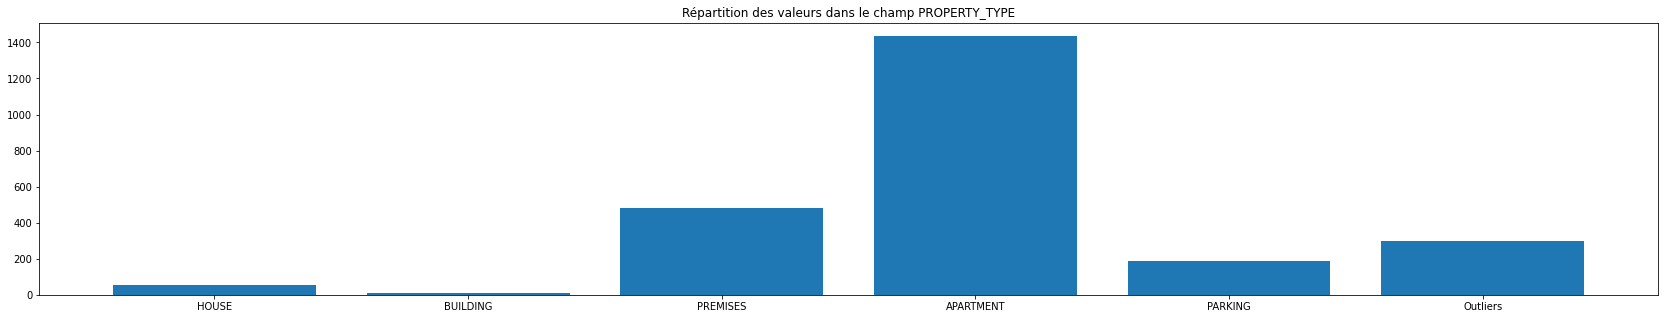

In [30]:
Figures.funShowHisto(Count, Property_types, True, "", "Répartition des valeurs dans le champ PROPERTY_TYPE")

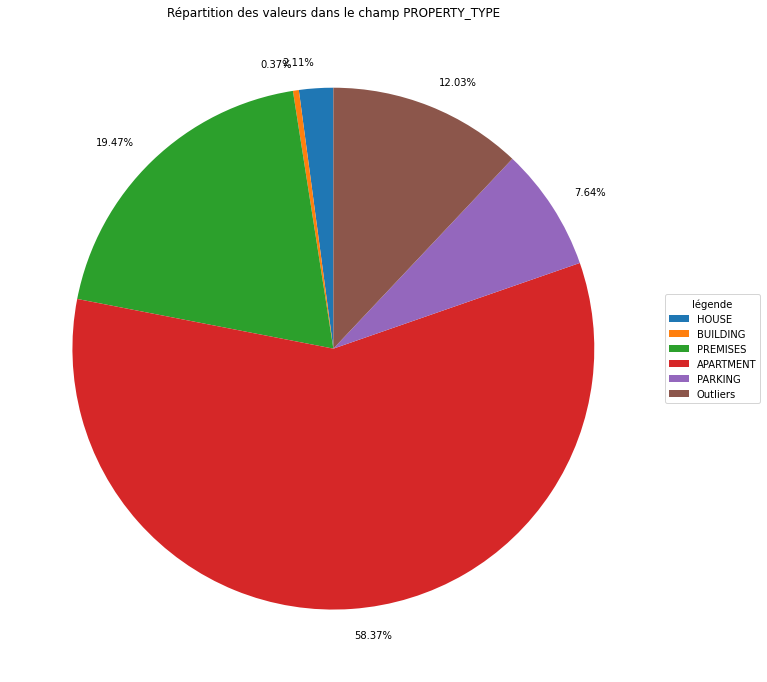

In [31]:
Figures.showPieChart(Property_types,Count,"Répartition des valeurs dans le champ PROPERTY_TYPE")

**AD.PROPERTY_TYPE Processing:**

*L'analyse montre que la colonne PROPERTY_TYPE est constitué de 12,03% de valeurs abberrantes (Outliers). Donc pour corriger ces données je propose la méthode suivante:*
- **Remplacer les valeurs abberantes par -1 pour dire valeur inconnue**


**Remplacer les valeurs aberrantes par -1 pour dire valeur inconnue ou absente:**

In [32]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType


def my_func(colValue):
    """Cette fonction vérifie si la valeur reçue en paramètre se trouve dans la liste listOfOfficialProperty_type_2
    NB pour pouvoir utiliser USERDefinedFunction() avec un corps lambda, si je souhaite appeler d'autres fonctions dans ce même corps, 
    je vais devoir créer toutes mes variables dans le corps des fonctions comme par exemple listOfOfficialProperty_type_2 qui est une copie d'une variable existante 
    appelée listOfOfficialProperty_type."""
    
    listOfOfficialProperty_type_2 = ["HOUSE", "APARTMENT", "PREMISES", "LAND", "BUILDING", "PARKING"]
    if (colValue in listOfOfficialProperty_type_2):
        return True
    return False

#Il semble que cette fonction UserDefinedFunction ne supporte pas que je définisse d'autres fonction dans le corps de la fonction Lambda ??
udfPropertyType = UserDefinedFunction(lambda x: x if (my_func(x)) else "-1", StringType())

#Permet d'avoir un nouveau Dataframe avec la colonne mise-à-jour.
data = data.withColumn('PROPERTY_TYPE', udfPropertyType(data.PROPERTY_TYPE))

In [33]:
#Résultat après le traitement:
data.select(data.PROPERTY_TYPE).show(100)

+-------------+
|PROPERTY_TYPE|
+-------------+
|    APARTMENT|
|    APARTMENT|
|    APARTMENT|
|     PREMISES|
|        HOUSE|
|    APARTMENT|
|     PREMISES|
|      PARKING|
|      PARKING|
|           -1|
|           -1|
|           -1|
|    APARTMENT|
|           -1|
|           -1|
|           -1|
|           -1|
|     PREMISES|
|    APARTMENT|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|    APARTMENT|
|           -1|
|           -1|
|           -1|
|           -1|
|    APARTMENT|
|    APARTMENT|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|           -1|
|     PREMISES|
|     PREMISES|
|     PREMISES|
|      PARKING|
|    APARTMENT|
|    APARTMENT|
|    APARTMENT|
|     PREMISES|
|      PARKING|
|    APARTMENT|
|           -1|
|           -1|
|           -1|
|           -1|
|       

**FIN AD.PROPERTY_TYPE Processing:**

**AD.PROPERTY.ZIP_CODE Processing:**

In [34]:
data.select(data.ZIP_CODE).show(2)

+--------+
|ZIP_CODE|
+--------+
|    null|
|   FALSE|
+--------+
only showing top 2 rows



In [35]:
#regroupement par ZIP_CODE
dataGroupByZip_code = data.groupBy('ZIP_CODE').count()
dataGroupByZip_code.show()

+--------------------+-----+
|            ZIP_CODE|count|
+--------------------+-----+
|2019-07-07T21:10:...|    1|
| {""price"":445000.0|    1|
|     Largier Gestion|    1|
|2019-08-20T14:53:...|    1|
|      Agence Laforêt|    5|
|""date"":""2019-0...|    1|
|2019-07-17T03:55:...|    1|
|2019-08-02T05:28:...|    1|
|               FALSE|  341|
|Pro Comm - Espace...|    3|
| {""price"":898000.0|    1|
|          1250000.00|    3|
|      IMAX LEVALLOIS|    3|
|2018-12-14T18:38:...|    1|
|2019-07-20T18:05:...|    1|
|                LEXA|    1|
|""date"":""2019-0...|    1|
|2019-08-22T19:11:...|    1|
| {""price"":375000.0|    2|
|"[{""price"":6500...|    1|
+--------------------+-----+
only showing top 20 rows



**Reporting:**

In [36]:
#Le fichier contient des propriétés sur Levallois-Perret
ZipCodeLevalloisPerret = 92300

In [37]:
#Dans cette section nous allons utiliser un instrument de visualisation pour voir comment les données sont réparties.
#Le code ci-dessous va permettre de regrouper les valeurs de la colonne n'appartenant pas la liste des types de bien

#Récupération des deux colonnes du groupBy sous forme de liste.
Zip_codes = dataGroupByZip_code.toPandas()["ZIP_CODE"].values.tolist()
Count = dataGroupByZip_code.toPandas()["count"].values.tolist()

cpt = 0
listIndexes = list()

#On compte le nombre de valeurs aberrantes dans la colonne en enregistrant leur position pour les enlever après.
for i in range(len(Zip_codes)):
    if Zip_codes[i] != str(ZipCodeLevalloisPerret):
        cpt +=1
        listIndexes.append(i)

#trie dans l'ordre décroissant pour éviter que l'index sorte de la liste.
sortedListIndexes = sorted(listIndexes, reverse=True)

#Suppressions des valeurs incorrectes issues du groupBy.
for i in sortedListIndexes:
    del Zip_codes[i]
    del Count[i]
        
Zip_codes.append("Outliers")
Count.append(cpt)

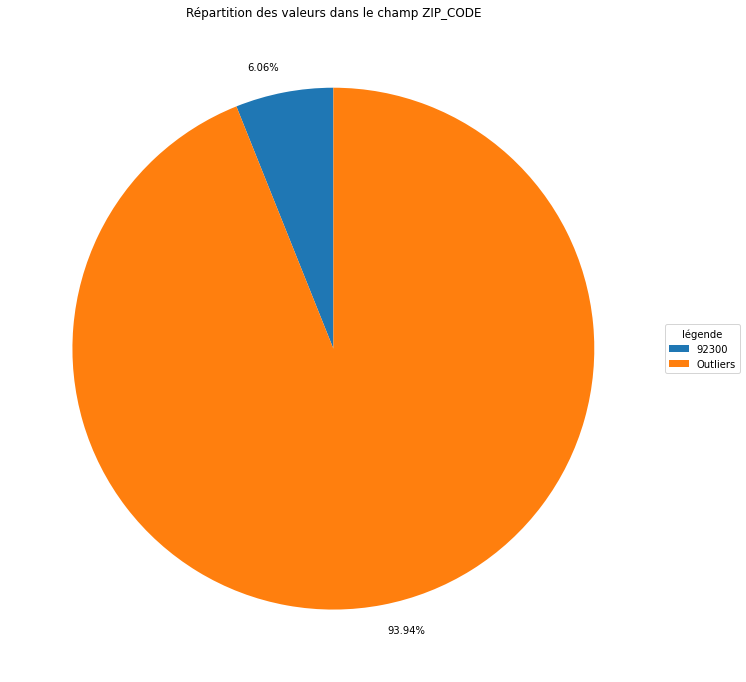

In [38]:
Figures.showPieChart(Zip_codes,Count,"Répartition des valeurs dans le champ ZIP_CODE")

**AD.ZIP_CODE Processing:**

*L'analyse montre que la colonne ZIP_CODE est constitué de 94% de valeurs abberrantes (Outliers). Donc pour corriger ces données je propose la méthode suivante:*
- **Remplacer les valeurs abberantes par 92300 parce que ce fichier de données ne concerne que la ville Levallois-Perret**


**Remplacer les valeurs abberantes par 92300:**

In [39]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType

udf_zipcode = UserDefinedFunction(lambda x: x if (x == str(ZipCodeLevalloisPerret)) else ZipCodeLevalloisPerret, StringType())

#Permet d'avoir un nouveau Dataframe avec la colonne mise-à-jour.
data = data.withColumn('ZIP_CODE', udf_zipcode(data.ZIP_CODE))

In [40]:
#Résultat après le traitement:
data.select(data.ZIP_CODE).show()

+--------+
|ZIP_CODE|
+--------+
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
|   92300|
+--------+
only showing top 20 rows



**FIN AD.PROPERTY.ZIP_CODE Processing:**

**AD.PROPERTY.CONSTRUCTION_YEAR Processing:**

In [41]:
data.select(data.CONSTRUCTION_YEAR).show(2)

+-----------------+
|CONSTRUCTION_YEAR|
+-----------------+
|               []|
|             null|
+-----------------+
only showing top 2 rows



In [42]:
#regroupement par ZIP_CODE
dataGroupByConstruction_year = data.groupBy('CONSTRUCTION_YEAR').count()
dataGroupByConstruction_year.show()

+--------------------+-----+
|   CONSTRUCTION_YEAR|count|
+--------------------+-----+
|                   7|    1|
|                1880|    1|
|                1987|    1|
|               FALSE|  176|
|""https://v.selog...|    1|
|         "[""GAS""]"|   22|
|               90.00|    1|
|                1910|    1|
|                   3|   13|
|""https://v.selog...|    1|
|                2019|    1|
|                   8|    3|
|                2017|    1|
|    "[""ELECTRIC""]"|   14|
|""https://v.selog...|    1|
|                   0|    6|
|                2000|    1|
|                1965|    1|
|                null| 3166|
|                1930|    2|
+--------------------+-----+
only showing top 20 rows



**Reporting:**

In [43]:
#Dans cette section nous allons utiliser un instrument de visualisation pour voir comment les données sont réparties.
#Le code ci-dessous va permettre de regrouper les valeurs de la colonne n'appartenant pas la liste des types de bien

#Récupération des deux colonnes du groupBy sous forme de liste.
Construction_years = dataGroupByConstruction_year.toPandas()["CONSTRUCTION_YEAR"].values.tolist()
Count = dataGroupByConstruction_year.toPandas()["count"].values.tolist()

cpt = 0
listIndexes = list()

#On compte le nombre de valeurs aberrantes dans la colonne en enregistrant leur position pour les enlever après.
for i in range(len(Construction_years)):
    if (bool( re.match(r"\b[0-9]{4}\b", str(Construction_years[i]))) == False):
        cpt +=1
        listIndexes.append(i)

#trie dans l'ordre décroissant pour éviter que l'index sorte de la liste.
sortedListIndexes = sorted(listIndexes, reverse=True)

#Suppressions des valeurs incorrectes issues du groupBy.
for i in sortedListIndexes:
    del Construction_years[i]
    del Count[i]
        
Construction_years.append("Outliers")
Count.append(cpt)

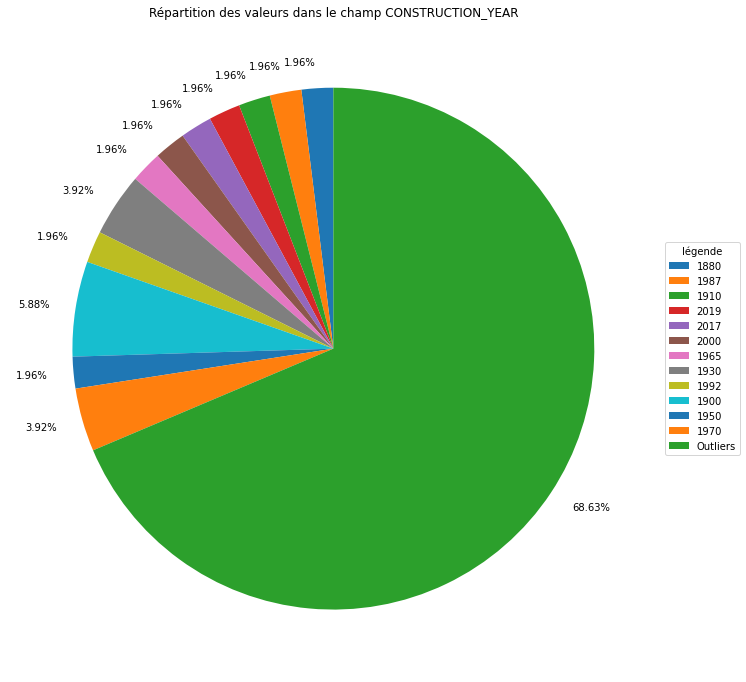

In [44]:
Figures.showPieChart(Construction_years,Count,"Répartition des valeurs dans le champ CONSTRUCTION_YEAR")

**AD.Property.CONSTRUCTION_YEAR Processing:**

*L'analyse montre que la colonne CONSTRUCTION_YEAR est constitué de 68,63% de valeurs aberrantes (Outliers). Donc pour corriger ces données je propose la méthode suivante:*
- **Remplacer les valeurs abberantes par -1 pour dire valeur inconnue**


**Remplacer les valeurs abberantes par -1:**

In [45]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType

def isYear(val):
    """Cette fonction vérifie si y a la présence d'une succession de 4 chiffres ou pas"""
    if bool(re.match(r"\b[0-9]{4}\b", str(val))):
        return True
    return False

udf_constructionYear = UserDefinedFunction(lambda x: str(x) if (isYear(x)) else "-1", StringType())

#Permet d'avoir un nouveau Dataframe avec la colonne mise-à-jour.
data = data.withColumn('CONSTRUCTION_YEAR', udf_constructionYear(data.CONSTRUCTION_YEAR))

In [46]:
#Résultat après le traitement:
data.select(data.CONSTRUCTION_YEAR).show()

+-----------------+
|CONSTRUCTION_YEAR|
+-----------------+
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
+-----------------+
only showing top 20 rows



**FIN AD.PROPERTY.CONSTRUCTION_YEAR Processing:**

**AD.PROPERTY.IMAGES Processing:**

In [47]:
#import ast
#predicat = """["https://cf-medias.avendrealouer.fr/image/_873908158_d.jpg","https://cf-medias.avendrealouer.fr/image/_873908159_d.jpg","https://cf-medias.avendrealouer.fr/image/_873908160_d.jpg","https://cf-medias.avendrealouer.fr/image/_873908161_d.jpg","https://cf-medias.avendrealouer.fr/image/_873908162_d.jpg"]"""
#data.select(data.IMAGES).filter(data.IMAGES != predicat).show(1)
#data.groupBy('IMAGES').count().show(250)
#x = ast.literal_eval(predicat)
#print(x)
#data.select(data.IMAGES).show(1)

In [48]:
data.select(data.IMAGES).show(2)

+--------------------+
|              IMAGES|
+--------------------+
|"[""https://cf-me...|
|"[""http://photos...|
+--------------------+
only showing top 2 rows



In [80]:
#regroupement par ZIP_CODE
dataGroupByImages = data.groupBy('IMAGES').count()
dataGroupByImages.count()


1811

**Reporting:**

In [96]:
import ast
import json
from urlextract import URLExtract

extractor = URLExtract()
#Dans cette section nous allons utiliser un instrument de visualisation pour voir comment les données sont réparties.
#Le code ci-dessous va permettre de regrouper les valeurs de la colonne n'appartenant pas la liste des types de bien

#Récupération des deux colonnes du groupBy sous forme de liste.
Images = dataGroupByImages.toPandas()["IMAGES"].values.tolist()
Count = dataGroupByImages.toPandas()["count"].values.tolist()
Images_copy = dataGroupByImages.toPandas()["IMAGES"].values.tolist()

cpt = 0
listIndexes = list()

#On compte le nombre de valeurs aberrantes dans la colonne en enregistrant leur position pour les enlever après.
for i in range(len(Images)):
    #permet de récupérer des URL.
    urls = extractor.find_urls(str(Images[i]))
    if(len(urls) == 0):
        cpt +=1
        listIndexes.append(i)
    
#trie dans l'ordre décroissant pour éviter que l'index sorte de la liste.
sortedListIndexes = sorted(listIndexes, reverse=True)

#Suppressions des valeurs incorrectes issues du groupBy.
for i in sortedListIndexes:
    del Images[i]
    del Count[i]
        
Images.append("Outliers")
Count.append(cpt)

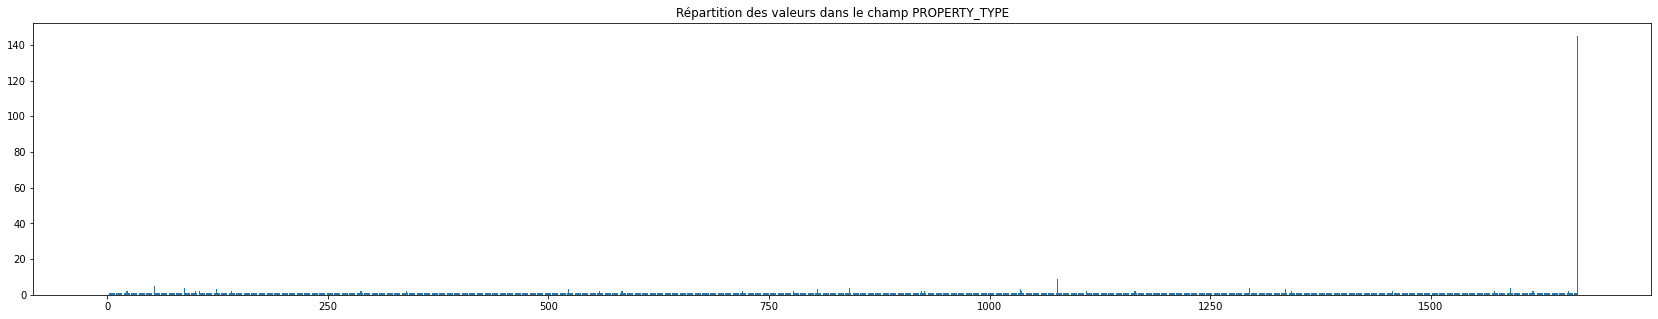

In [97]:
Figures.funShowHisto(Count, Images, False, "", "Répartition des valeurs dans le champ IMAGES")

**AD.Property.IMAGES Processing:**

*L'analyse montre que la colonne IMAGES est constitué de plus de 140 valeurs aberrantes (Outliers). Donc pour corriger ces données je propose la méthode suivante:*
- **Remplacer les valeurs abberantes par -1 pour dire valeur inconnue**


**Remplacer les valeurs abberantes par -1:**

In [100]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType
from urlextract import URLExtract

extractor = URLExtract()

def containURL(val):
    if len(extractor.find_urls(str(val))) != 0:
        return True
    return False

udf_images = UserDefinedFunction(lambda x: str(x) if (containURL(x)) else "-1", StringType())

#Permet d'avoir un nouveau Dataframe avec la colonne mise-à-jour.
data = data.withColumn('IMAGES', udf_images(data.IMAGES))

In [101]:
#Résultat après le traitement:
data.select(data.IMAGES).show()

+--------------------+
|              IMAGES|
+--------------------+
|"[""https://cf-me...|
|"[""http://photos...|
|"[""https://v.sel...|
|                  -1|
|"[""https://v.sel...|
|"[""http://photo3...|
|"[""https://v.sel...|
|"[""http://photos...|
|                  -1|
|                  -1|
|                  -1|
|                  -1|
|                  -1|
|                  -1|
|                  -1|
|                  -1|
|                  -1|
|"[""https://pix.y...|
|                  -1|
|                  -1|
+--------------------+
only showing top 20 rows



**FIN AD.PROPERTY.IMAGES Processing:**

**AD.PROPERTY.Surface Processing:**

In [104]:
data.select(data.SURFACE).show(2)

+--------------------+
|             SURFACE|
+--------------------+
|""https://cf-medi...|
|""http://photos.u...|
+--------------------+
only showing top 2 rows



In [107]:
#regroupement par ZIP_CODE
dataGroupBySurface = data.groupBy('SURFACE').count()
dataGroupBySurface.show()

+--------------------+-----+
|             SURFACE|count|
+--------------------+-----+
|""https://v.selog...|    1|
|""https://v.selog...|    1|
|""https://v.selog...|    1|
|""https://cf-medi...|    1|
|""https://media.p...|    1|
|         Salle d'eau|    1|
|""http://thumbor....|    1|
|""https://v.selog...|    1|
|""https://v.selog...|    1|
|""https://media.i...|    2|
|""https://media.i...|    1|
|""http://thumbor....|    1|
|""https://v.selog...|    1|
|""https://v.selog...|    1|
|               38.00|    2|
|""https://v.selog...|    1|
|""https://v.selog...|    1|
|""https://mmf.log...|    1|
|""http://thumbor....|    5|
| rue Président wi...|    2|
+--------------------+-----+
only showing top 20 rows



**Reporting:**

In [43]:
#Dans cette section nous allons utiliser un instrument de visualisation pour voir comment les données sont réparties.
#Le code ci-dessous va permettre de regrouper les valeurs de la colonne n'appartenant pas la liste des types de bien

#Récupération des deux colonnes du groupBy sous forme de liste.
Surfaces = dataGroupBySurface.toPandas()["SURFACE"].values.tolist()
Count = dataGroupBySurface.toPandas()["count"].values.tolist()

cpt = 0
listIndexes = list()

#On compte le nombre de valeurs aberrantes dans la colonne en enregistrant leur position pour les enlever après.
for i in range(len(Surfaces)):
    try:
        double = float(Surfaces[i])
        if (bool( re.match(r"\b[0-9]{4}\b", str(Construction_years[i]))) == False):
            cpt +=1
            listIndexes.append(i)
    except TypeError:
        cpt +=1
        listIndexes.append(i)

#trie dans l'ordre décroissant pour éviter que l'index sorte de la liste.
sortedListIndexes = sorted(listIndexes, reverse=True)

#Suppressions des valeurs incorrectes issues du groupBy.
for i in sortedListIndexes:
    del Construction_years[i]
    del Count[i]
        
Construction_years.append("Outliers")
Count.append(cpt)

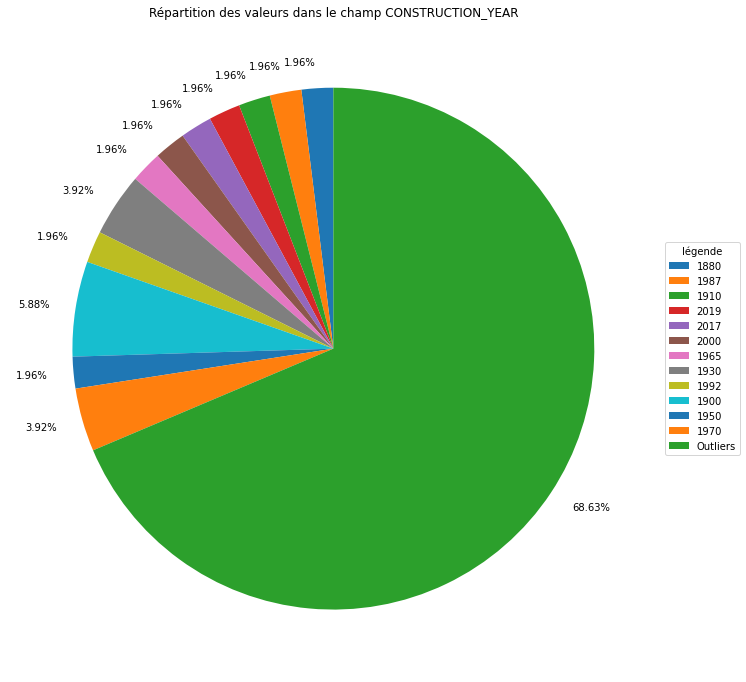

In [44]:
Figures.showPieChart(Construction_years,Count,"Répartition des valeurs dans le champ CONSTRUCTION_YEAR")

**AD.Property.CONSTRUCTION_YEAR Processing:**

*L'analyse montre que la colonne CONSTRUCTION_YEAR est constitué de 68,63% de valeurs aberrantes (Outliers). Donc pour corriger ces données je propose la méthode suivante:*
- **Remplacer les valeurs abberantes par -1 pour dire valeur inconnue**


**Remplacer les valeurs abberantes par -1:**

In [45]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import StringType

def isYear(val):
    """Cette fonction vérifie si y a la présence d'une succession de 4 chiffres ou pas"""
    if bool(re.match(r"\b[0-9]{4}\b", str(val))):
        return True
    return False

udf_constructionYear = UserDefinedFunction(lambda x: str(x) if (isYear(x)) else "-1", StringType())

#Permet d'avoir un nouveau Dataframe avec la colonne mise-à-jour.
data = data.withColumn('CONSTRUCTION_YEAR', udf_constructionYear(data.CONSTRUCTION_YEAR))

In [46]:
#Résultat après le traitement:
data.select(data.CONSTRUCTION_YEAR).show()

+-----------------+
|CONSTRUCTION_YEAR|
+-----------------+
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
|               -1|
+-----------------+
only showing top 20 rows



**FIN AD.PROPERTY.Surface Processing:**

In [ ]:
#ID = list(map(lambda x:x if bool( re.match(r"\b[0-9a-f]{8}\b-[0-9a-f]{4}-[0-9a-f]{4}-[0-9a-f]{4}-\b[0-9a-f]{12}\b", x) ) else "" ,ID) )
#print (ID)
#dataID.select(data.ID, data.URL).show(100)